In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./testImages/RicardoKaka.jpg')

In [3]:
img.shape

(371, 660, 3)

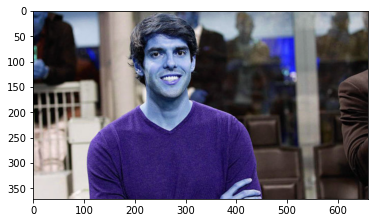

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
gray.shape

(371, 660)

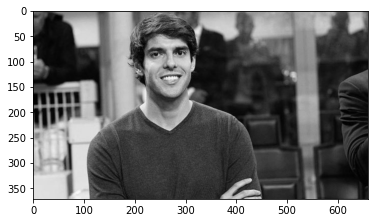

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
gray

array([[123, 126, 124, ..., 103,  94,  87],
       [123, 126, 124, ..., 103,  95,  89],
       [122, 124, 122, ..., 102,  95,  90],
       ...,
       [222, 222, 221, ...,  28,  27,  26],
       [222, 222, 221, ...,  28,  27,  26],
       [222, 222, 221, ...,  28,  27,  26]], dtype=uint8)

In [9]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

In [10]:
faces = face_cascade.detectMultiScale(gray,1.3,5)

In [11]:
faces

array([[209,  38, 120, 120]])

In [12]:
(x,y,w,h) = faces[0]

In [13]:
x,y,w,h

(209, 38, 120, 120)

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(250,0,0),2)

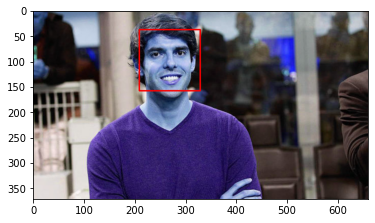

In [15]:
plt.imshow(face_img)

In [16]:
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

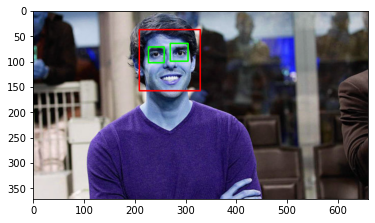

In [17]:
cv2.destroyAllWindows()
for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

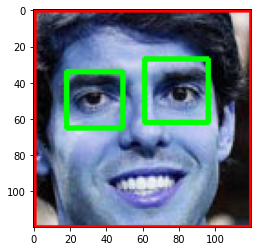

In [18]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
   
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [20]:
original_image= cv2.imread('./testImages/RicardoKaka.jpg')

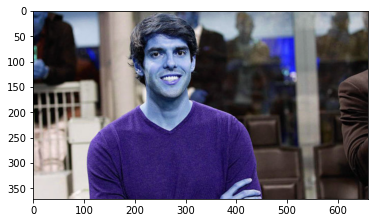

In [21]:
plt.imshow(original_image)

In [22]:
cropped_image = get_cropped_image_if_2_eyes('./testImages/RicardoKaka.jpg')

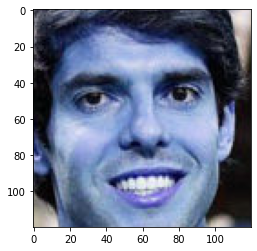

In [23]:
plt.imshow(cropped_image)

In [24]:
org_img_obstructed = cv2.imread('./testImages/Kaka2.jpg')

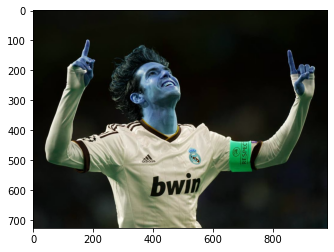

In [25]:
plt.imshow(org_img_obstructed)

In [26]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./testImages/Kaka2.jpg')

In [27]:
cropped_image_no_2_eyes

In [28]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [29]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [30]:
img_dirs

['./datasets/lionel_messi',
 './datasets/mustafizur_rahman',
 './datasets/neymar_Jr',
 './datasets/roger_federer',
 './datasets/virat_kohli']

In [31]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [32]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

lionel_messi
Generating cropped images in folder:  ./datasets/cropped/lionel_messi
mustafizur_rahman
Generating cropped images in folder:  ./datasets/cropped/mustafizur_rahman
neymar_Jr
Generating cropped images in folder:  ./datasets/cropped/neymar_Jr
roger_federer
Generating cropped images in folder:  ./datasets/cropped/roger_federer
virat_kohli
Generating cropped images in folder:  ./datasets/cropped/virat_kohli


In [51]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [52]:
wim = w2d(cropped_image,'db1',5)

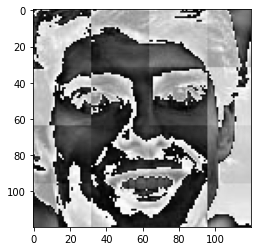

In [53]:
plt.imshow(wim, cmap='gray')

In [54]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./datasets/cropped/lionel_messi\\lionel_messi1.png',
  './datasets/cropped/lionel_messi\\lionel_messi10.png',
  './datasets/cropped/lionel_messi\\lionel_messi11.png',
  './datasets/cropped/lionel_messi\\lionel_messi13.png',
  './datasets/cropped/lionel_messi\\lionel_messi14.png',
  './datasets/cropped/lionel_messi\\lionel_messi15.png',
  './datasets/cropped/lionel_messi\\lionel_messi16.png',
  './datasets/cropped/lionel_messi\\lionel_messi17.png',
  './datasets/cropped/lionel_messi\\lionel_messi18.png',
  './datasets/cropped/lionel_messi\\lionel_messi19.png',
  './datasets/cropped/lionel_messi\\lionel_messi2.png',
  './datasets/cropped/lionel_messi\\lionel_messi20.png',
  './datasets/cropped/lionel_messi\\lionel_messi22.png',
  './datasets/cropped/lionel_messi\\lionel_messi23.png',
  './datasets/cropped/lionel_messi\\lionel_messi24.png',
  './datasets/cropped/lionel_messi\\lionel_messi25.png',
  './datasets/cropped/lionel_messi\\lionel_messi26.png',
  './datasets/cro

In [55]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'mustafizur_rahman': 1,
 'neymar_Jr': 2,
 'roger_federer': 3,
 'virat_kohli': 4}

In [56]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [57]:
len(X[0])

4096

In [58]:
len(y)

161

In [59]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [60]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(161, 4096)

In [61]:
X[0]

array([100., 129., 140., ..., 237., 234., 232.])

In [110]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [112]:
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = 'rbf', C=10))])

In [113]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [114]:
pipe.score(X_test,y_test)

0.7560975609756098

In [115]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.83      0.56      0.67         9
           2       0.64      1.00      0.78         9
           3       1.00      0.67      0.80         6
           4       0.78      0.70      0.74        10

    accuracy                           0.76        41
   macro avg       0.80      0.76      0.76        41
weighted avg       0.79      0.76      0.75        41



In [200]:
from sklearn.model_selection import GridSearchCV

In [201]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [202]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.808333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.600000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.800000,{'logisticregression__C': 1}


In [203]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [214]:
best_estimators['svm'].score(X_test,y_test)

0.7804878048780488

In [229]:
best_estimator_clf = best_estimators['svm']

In [231]:
best_estimator_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [232]:
d_clf = SVC(C=1, kernel='linear',gamma='auto')
d_clf.fit(X_train,y_train)


SVC(C=1, gamma='auto', kernel='linear')

In [233]:
best_clf.score(X_test,y_test)

0.8048780487804879

In [234]:
best_pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC(kernel = 'linear', C=1,gamma='auto',probability=True))])

In [235]:
best_pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [236]:
best_pipe.score(X_test,y_test)

0.7804878048780488

In [237]:
from sklearn.preprocessing import MinMaxScaler

In [238]:
best_model = Pipeline([('scaler', MinMaxScaler()),('svc', SVC(kernel = 'linear', C=1,gamma='auto',probability=True))])

In [239]:
best_model.fit(X_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [240]:
best_model.score(X_test,y_test)

0.8048780487804879

In [243]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,best_model.predict(X_test))
cm

array([[6, 0, 1, 0, 0],
       [1, 6, 0, 1, 1],
       [0, 0, 9, 0, 0],
       [1, 1, 0, 4, 0],
       [0, 0, 2, 0, 8]], dtype=int64)

Text(69.0, 0.5, 'Truth')

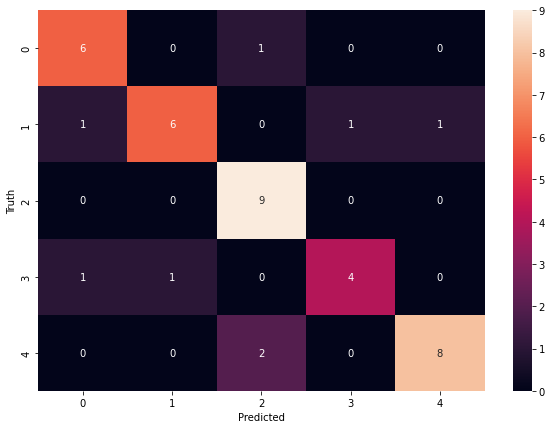

In [248]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [246]:
class_dict

{'lionel_messi': 0,
 'mustafizur_rahman': 1,
 'neymar_Jr': 2,
 'roger_federer': 3,
 'virat_kohli': 4}

In [250]:
import joblib
joblib.dump(best_model,'saved_model.pkl')

['saved_model.pkl']

In [251]:
import json
with open('class_dictionary.json',"w") as f:
    f.write(json.dumps(class_dict))